In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
# try:
#   data = pd.read_csv('/content/download.csv')
# except FileNotFoundError:
#   print("Sample data will be genrated for demostration")

np.random.seed(42)
timestamps = np.arange(0,1000,1)
rssi = np.random.uniform(-90,-50,1000)
data = pd.DataFrame({'timestamp':timestamps,'rssi':rssi})
print("Generated sample data: ")
print(data)

Generated sample data: 
     timestamp       rssi
0            0 -75.018395
1            1 -51.971428
2            2 -60.720242
3            3 -66.053661
4            4 -83.759254
..         ...        ...
995        995 -86.336717
996        996 -53.307457
997        997 -84.527255
998        998 -51.990506
999        999 -72.159769

[1000 rows x 2 columns]


In [14]:
def create_sequences(values, sequence_length):
    sequences = []
    targets = []
    for i in range(len(values) - sequence_length):
        sequences.append(values[i:i+sequence_length])
        targets.append(values[i+sequence_length])
    return np.array(sequences), np.array(targets)

In [23]:
A,B = create_sequences(data['rssi'].values,10)
print(A)

[[-75.01839525 -51.97142774 -60.72024233 ... -55.35295417 -65.95539953
  -61.67709689]
 [-51.97142774 -60.72024233 -66.05366063 ... -65.95539953 -61.67709689
  -89.17662023]
 [-60.72024233 -66.05366063 -83.75925438 ... -61.67709689 -89.17662023
  -51.20360591]
 ...
 [-72.60690646 -80.14391867 -57.23590729 ... -75.56104412 -86.33671707
  -53.30745698]
 [-80.14391867 -57.23590729 -58.02336484 ... -86.33671707 -53.30745698
  -84.52725476]
 [-57.23590729 -58.02336484 -62.21214117 ... -53.30745698 -84.52725476
  -51.99050585]]


In [24]:
SEQUENCE_LENGTH = 10

scaler = MinMaxScaler(feature_range = (-1,1))
rssi_scaled = scaler.fit_transform(data['rssi'].values.reshape(-1,1))

X,y = create_sequences(rssi_scaled,SEQUENCE_LENGTH)

print(f"\nSequence shape: {X.shape}")
print(f"Target shape: {y.shape}")


Sequence shape: (990, 10, 1)
Target shape: (990, 1)


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(SEQUENCE_LENGTH, 1)),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\nModel Summary:")
model.summary()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3445 - val_loss: 0.3402
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3393 - val_loss: 0.3400
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3533 - val_loss: 0.3407
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3372 - val_loss: 0.3420
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3591 - val_loss: 0.3413
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3292 - val_loss: 0.3424
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3509 - val_loss: 0.3413
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3428 - val_loss: 0.3405
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3531 - val_loss: 0.3408
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3487 - val_loss: 0.3416
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3386 - val_loss: 0.3416
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 10, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

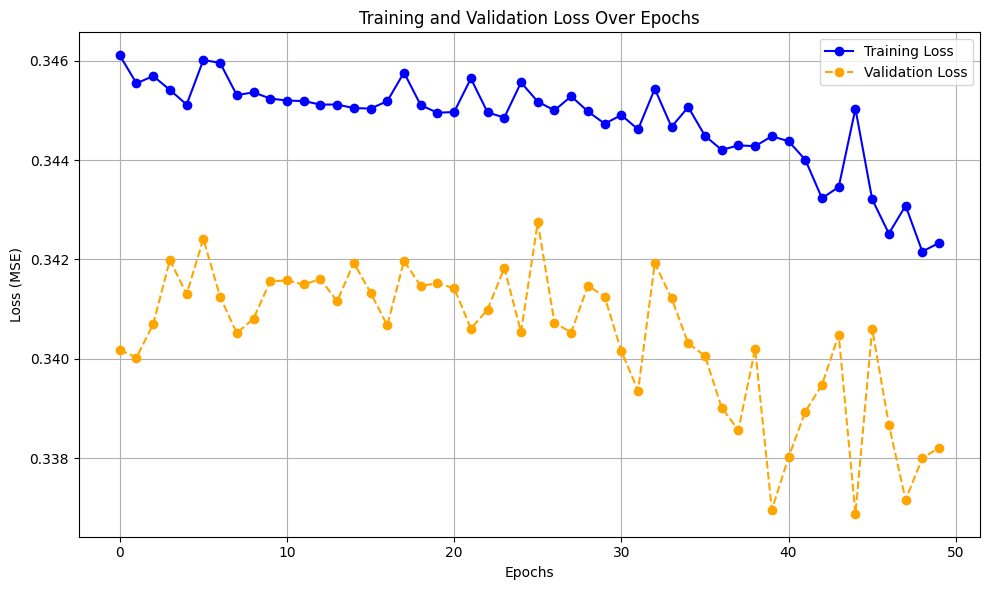

In [35]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o', linestyle='dashed')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
# Convert to TFLite
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
converter.experimental_enable_resource_variables = True
tflite_model = converter.convert()

# Save the TFLite model
with open('wifi_rssi_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Create C array for ESP32
with open('wifi_rssi_model.h', 'w') as f:
    f.write('const unsigned char wifi_rssi_model[] = {')
    f.write(','.join([str(x) for x in tflite_model]))
    f.write('};')

print("Model size:", len(tflite_model), "bytes")

# Download the files
from google.colab import files
files.download('wifi_rssi_model.tflite')
files.download('wifi_rssi_model.h')

Saved artifact at '/tmp/tmp7zfs3isx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 1), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138247185571808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247179551664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247179559232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247178559808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247179562048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247178564912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247178565440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138247178559104: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model size: 30040 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>